# Introduction

Welcome to this exciting analysis of world population data! In this notebook, we'll be diving into some fascinating information about the distribution of people around the globe. The data we'll be using comes from the <a href="https://www.kaggle.com/datasets/iamsouravbanerjee/world-population-dataset">world_population.csv</a> file, which contains information on population by country for years from 1970 to 2022.

But before we start, let's take a moment to appreciate the sheer scale of the world's population. As of 2022, the estimated global population is around 7.9 billion people. That's a lot of people! And it's only going to keep growing. It's important to understand how this population is distributed across different countries and continents so that we can better anticipate and plan for the future.

<a id="data-preparation"></a>
# Data Preparation

First things first, let's read in the world_population.csv file and store it in a variable called world_population. After that, we'll install and load the tidyverse package, which is a collection of packages that make data manipulation and visualization a breeze.

With the data loaded and tidyverse at our disposal, we can start making sense of all those numbers. But before we dive in, let's clean up the column names of the world_population dataframe to make them a bit more intuitive.

In [1]:
world_population <- read.csv("world_population.csv")

library("tidyverse")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
# Change the column names to be more understandable for analysis
colnames(world_population) <- c("rank", "cca3", "country", "capital", "continent", "pop_2022", "pop_2020", "pop_2015", "pop_2010", "pop_2000", "pop_1990", "pop_1980", "pop_1970", "area", "density", "growth_rate", "pct_world_pop")

head(world_population)

,rank,cca3,country,capital,continent,pop_2022,pop_2020,pop_2015,pop_2010,pop_2000,pop_1990,pop_1980,pop_1970,area,density,growth_rate,pct_world_pop
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
2,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
3,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
4,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
5,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
6,42,AGO,Angola,Luanda,Africa,35588987,33428485,28127721,23364185,16394062,11828638,8330047,6029700,1246700,28.5466,1.0315,0.45


In [3]:
summary(world_population)

      rank            cca3             country            capital         
 Min.   :  1.00   Length:234         Length:234         Length:234        
 1st Qu.: 59.25   Class :character   Class :character   Class :character  
 Median :117.50   Mode  :character   Mode  :character   Mode  :character  
 Mean   :117.50                                                           
 3rd Qu.:175.75                                                           
 Max.   :234.00                                                           
  continent            pop_2022            pop_2020            pop_2015        
 Length:234         Min.   :5.100e+02   Min.   :5.200e+02   Min.   :5.640e+02  
 Class :character   1st Qu.:4.197e+05   1st Qu.:4.153e+05   1st Qu.:4.047e+05  
 Mode  :character   Median :5.560e+06   Median :5.493e+06   Median :5.307e+06  
                    Mean   :3.407e+07   Mean   :3.350e+07   Mean   :3.173e+07  
                    3rd Qu.:2.248e+07   3rd Qu.:2.145e+07   3rd Qu.:1.973e+

<a id="Analysis"></a>
# Analysis
<a id="pop-by-country"></a>
<h4>Population by Country</h4>

To kick things off, let's sort the data by population in 2022 in descending order. This will allow us to quickly identify the top 15 countries by population in 2022. 

In [4]:
# Sort the data by population in 2022 in descending order, then select the top 15 countries by population
world_population <- world_population[order(world_population$pop_2022, decreasing = TRUE),]
top_15 <- world_population[1:15,]

In [5]:
# Create a new column with the population values displayed in the specified format to make them more understandble for the charts
top_15$pop_2022_formatted <- format(top_15$pop_2022, big.mark=",", scientific=FALSE, trim=TRUE)
top_15$pop_2022_formatted <- gsub("^(\\d+)(\\d{3})$", "\\1,\\2", top_15$pop_2022_formatted, perl=TRUE)
top_15$pop_2022_formatted <- gsub("(\\d)(?=(\\d{3})+$)", "\\1,", top_15$pop_2022_formatted, perl=TRUE)
top_15$pop_2022_formatted <- gsub("\\.00", "", top_15$pop_2022_formatted, perl=TRUE)

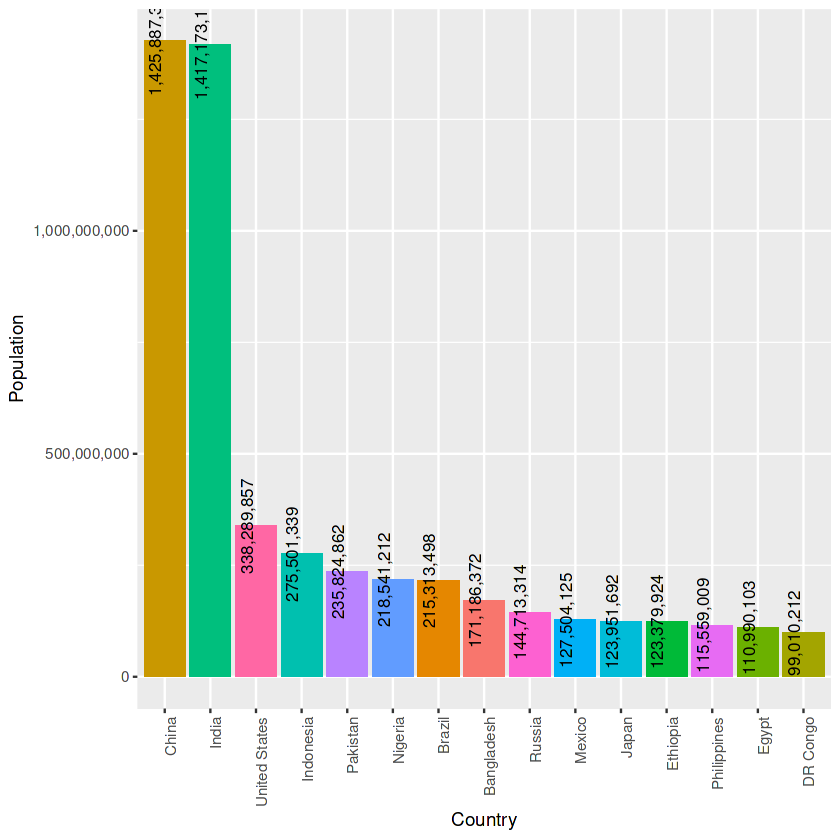

In [6]:
# Create a bar chart showing top 15 countries with the highest  populations (2022)
ggplot(top_15, aes(x = reorder(country, -pop_2022), y = pop_2022, fill = country)) +
  geom_bar(stat = "identity") +
  labs(x = "Country", y = "Population") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  scale_y_continuous(labels = scales::comma) +
  geom_text(aes(label = pop_2022_formatted), angle = 90, vjust = -0.25, color = "black", size = 3.5) +
  theme(legend.position = "none")

As we can see from the bar chart created, China and India have the largest populations in 2022, with over 1.5 billion people each. That's almost 40% of the entire world's population in just two countries. The United States, Indonesia, Pakistan, Nigeria, and Brazil follow.

<a id="pop-by-continent"></a>
<h4>Population by Continent</h4>

Next, let's take a look at how the world's population is distributed across different continents. We group the data by continent and sum the populations. Then, we calculate the proportion of the population by continent and multiply it by 100 to get the percentages.



In [7]:
#Group the data by continent and sum the populations
pop_by_continent <- aggregate(pop_2022 ~ continent, data = world_population, FUN = sum)

#Calculate the proportions of the population by continent
pop_by_continent$prop <- prop.table(pop_by_continent$pop_2022)

#Multiply the proportions by 100 to get the percentages
pop_by_continent$percent <- pop_by_continent$prop * 100

#Round the percentage values to 2 decimal places
pop_by_continent$percent_formatted <- sprintf("%.2f", pop_by_continent$percent)

#Combine the continent names and percentage values into a single string, with the percentage value followed by the percent symbol
pop_by_continent$label <- paste(pop_by_continent$percent_formatted, "%")

#Reorder the continent names for the pie chart
pop_by_continent$continent <- factor(pop_by_continent$continent, levels = rev(c("Africa" ,"Europe","North America", 
                                            "Oceania","Asia","South America")))

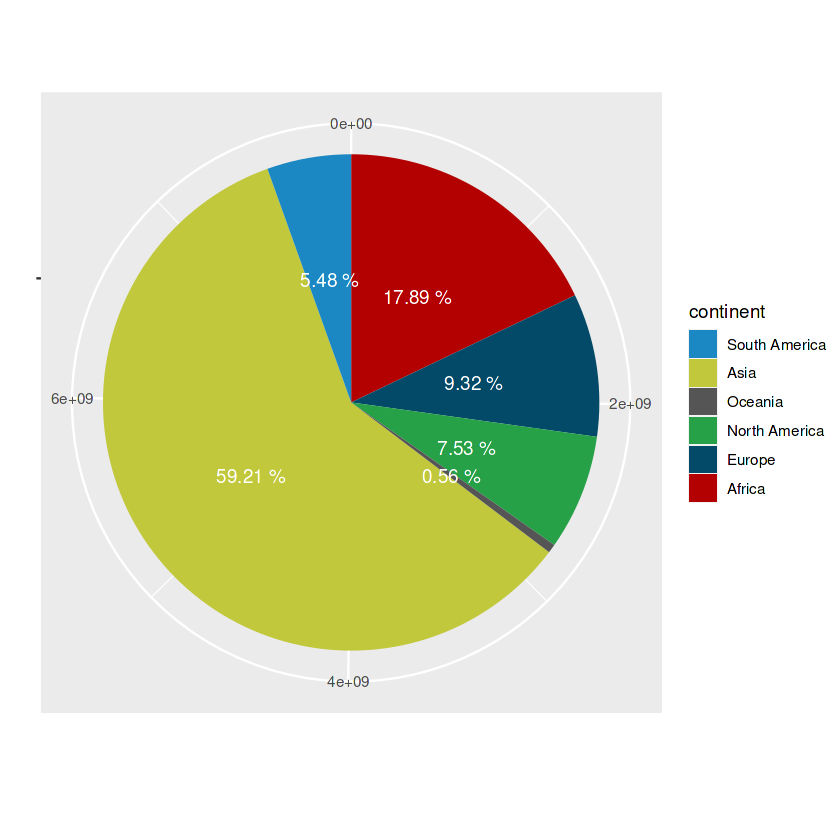

In [8]:
# Define the colors of the chart
colors <- c("#1c88c3", "#c1c83c", "#555555", "#27a147", "#034a68", "#b30000", "#6fc59f")

# Create the pie chart using the formatted labels
ggplot(pop_by_continent, aes(x = "", y = pop_2022, fill = continent)) +
  geom_bar(width = 1, stat = "identity") +
  coord_polar("y", start = 0) +
  labs(x = "", y = "") +
  geom_text(aes(label = label), position = position_stack(vjust = 0.5), colour = "white") +
  scale_fill_manual(values = colors) +
  theme(legend.position = "right")

As we can see from the pie chart, Asia has the largest percentage of the world population with 59.21%, followed by Africa at 17.89%. Europe, North America, South America, and Oceania have smaller percentages at 9.32%, 7.53%, 5.48%, and 0.56%, respectively.

<a id="num-of-countries-per-continent"></a>
<h4>Number of Countries per Continent</h4>

Now let's look at how many countries each continent have. 

In [9]:
# First, create a new data frame with the continent and number of countries
continent_counts <- world_population %>%
  group_by(continent) %>%
  summarize(n_countries = n())

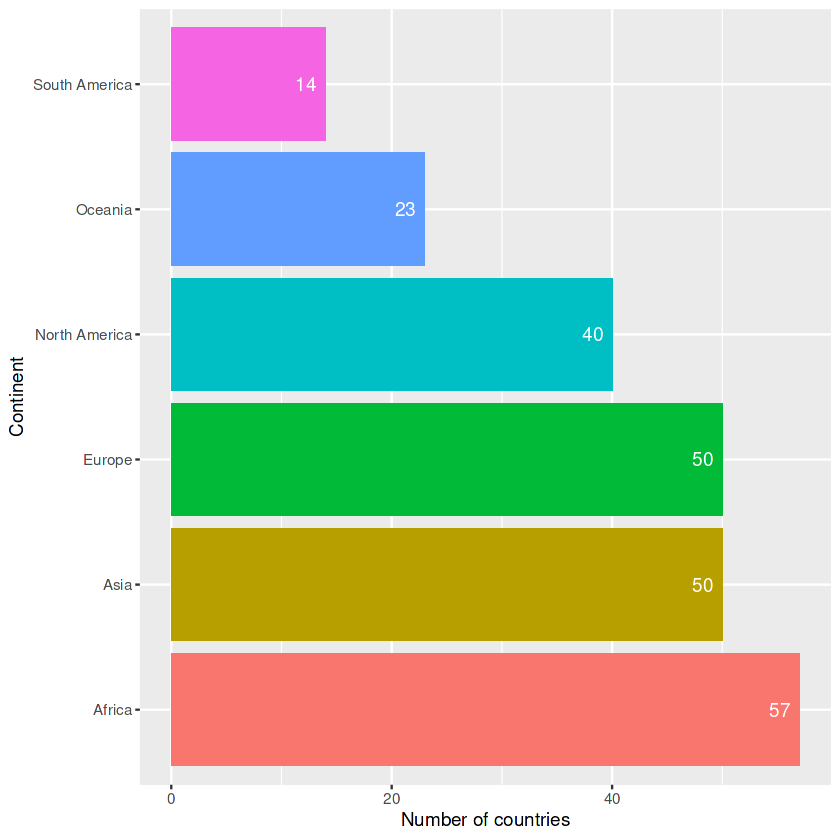

In [10]:
# Now create the plot using ggplot
ggplot(data = continent_counts, aes(x = n_countries, y = continent, fill = continent)) +
  geom_col() +
  labs(x = "Number of countries", y = "Continent") +
  theme(legend.position = "none") +
  geom_text(aes(label = n_countries), hjust = 1.4, color = "white")

We see that Africa has more countries than other continents. Even though Asia holds the highest population percentage in the world, it has the second highest number of countries. Its also very interesting to see that Ocenania holds 0.59 percentage of total world population but has more countries than South America. This is because Oceania has a lot of small island countries such as Samoa, Solomon Islands, Fiji and Micronesia.

<a id="pop-growths"></a>
<h4>Population Growths</h4>

In this section, we will be analyzing the population growth rate of different continents over the past 50 years divided into periods(1970-1990, 1990-2010 and 2010-2020). By analyzing the growth rate of each continent during specific time periods, we can understand how population growth has varied over time and compare it across different regions of the world.



In [11]:
# Calculate the growth rate for each period, Group the data by continent and calculate the sum of the growth rates for each period
continent_growth <- world_population %>%
  mutate(growth_1970_1990 = (pop_1990 - pop_1970) / pop_1970,
         growth_1990_2010 = (pop_2010 - pop_1990) / pop_1990,
         growth_2010_2020 = (pop_2020 - pop_2010) / pop_2010) %>%
  group_by(continent) %>%
  summarize(growth_1970_1990 = sum(growth_1970_1990),
            growth_1990_2010 = sum(growth_1990_2010),
            growth_2010_2020 = sum(growth_2010_2020))

<h4>1970 - 1990</h4>


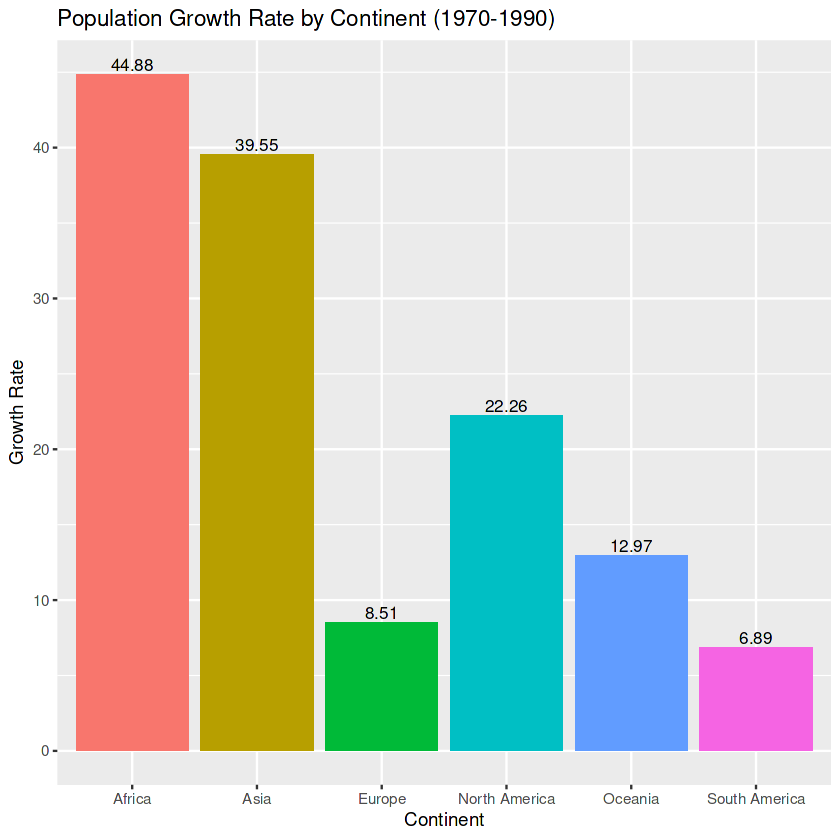

In [12]:
ggplot(continent_growth, aes(x = continent, y = growth_1970_1990, fill = continent)) +
  geom_bar(stat = "identity") +
  labs(title = "Population Growth Rate by Continent (1970-1990)", x = "Continent", y = "Growth Rate") +
  geom_text(aes(label = round(growth_1970_1990, 2)), hjust = 0.5, vjust = -0.25, size = 3.5) +
  theme(legend.position = "none")

We can see that Africa has the highest population growth rate during the period of 1970-1990 with 44.88%, followed by Asia at 39.55%. Europe, North America, Oceania and South America have lower growth rates at 8.51%, 22.26%,12.97% and 6.89%, respectively.

<h4>1990 - 2010</h4>


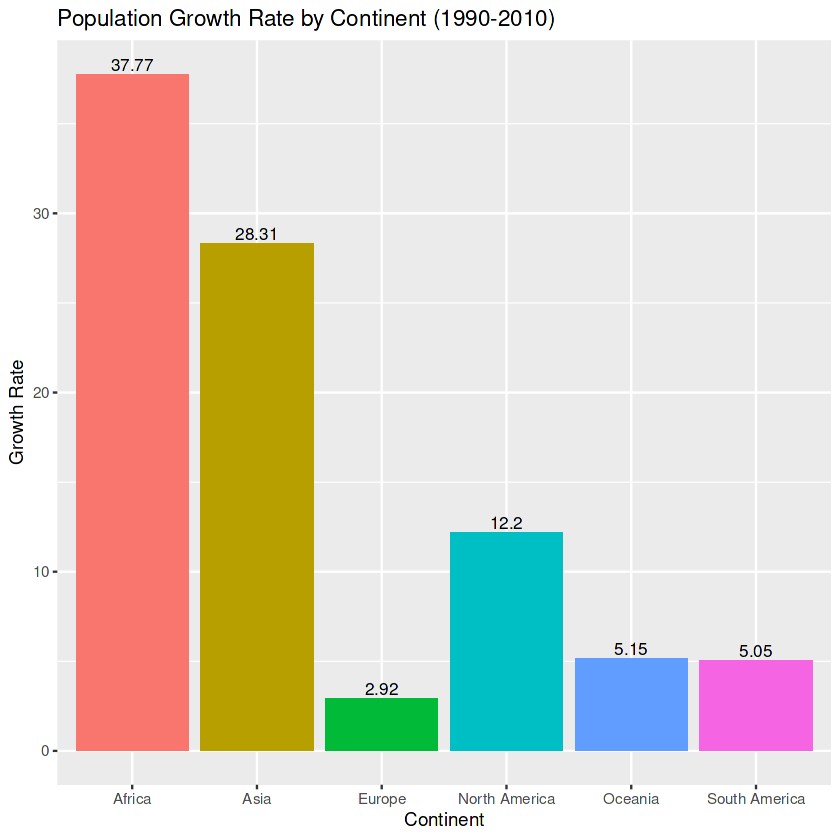

In [13]:
ggplot(continent_growth, aes(x = continent, y = growth_1990_2010, fill = continent)) +
  geom_bar(stat = "identity") +
  labs(title = "Population Growth Rate by Continent (1990-2010)", x = "Continent", y = "Growth Rate") +
  geom_text(aes(label = round(growth_1990_2010, 2)), hjust = 0.5, vjust = -0.25, size = 3.5) +
  theme(legend.position = "none")

The second chart shows us that Africa has the highest population growth rate during the period of 1990-2010 with 37.77%, followed by Asia at 28.31%. Europe, North America, Oceania and South America have lower growth rates at 2.92%, 12.2%, 5.15%, and 5.05%, respectively.

<h4>2010 - 2020</h4>


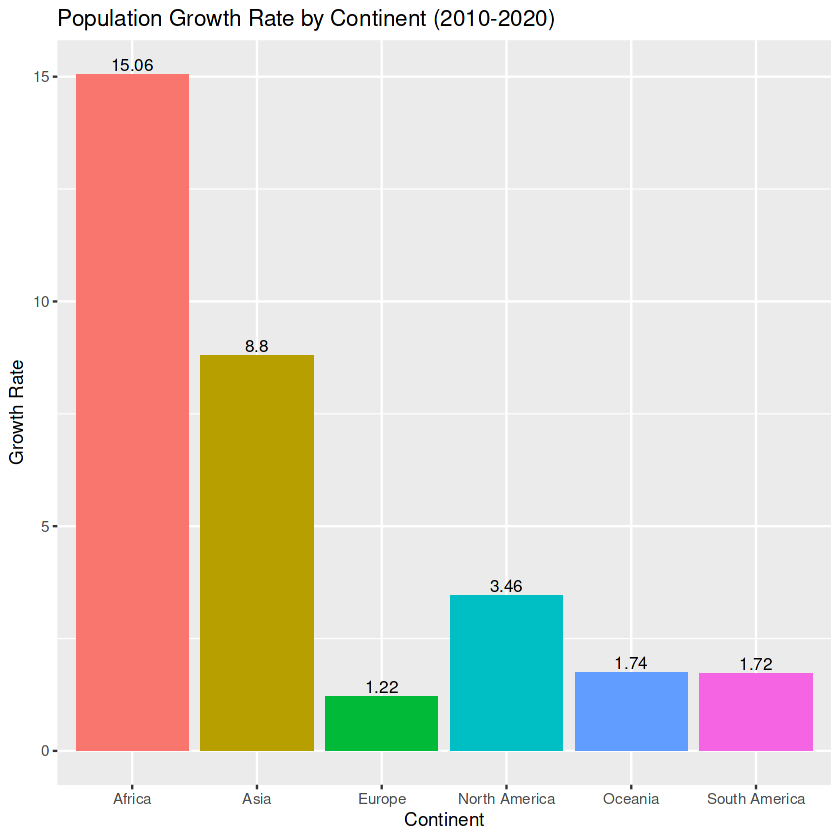

In [14]:
ggplot(continent_growth, aes(x = continent, y = growth_2010_2020, fill = continent)) +
  geom_bar(stat = "identity") +
  labs(title = "Population Growth Rate by Continent (2010-2020)", x = "Continent", y = "Growth Rate") +
  geom_text(aes(label = round(growth_2010_2020, 2)), vjust = -0.25, size = 3.5) +
  theme(legend.position = "none")

The third chart shows us that Africa has the highest population growth rate during the period of 2010-2020 with 15.05%, followed by Asia at 8.8%. Europe, North America, Oceania and South America have lower growth rates at 1.22%, 3.46%, 1.74%, and 1.72%, respectively.

<h3>Section Conclusion</h3>

From the analysis of population growth rate by continent, we can see that Africa has consistently had the highest population growth rate over the past 50 years, followed by Asia. Europe, North America, South America, and Oceania have had lower growth rates during this time period. This data suggests that population growth in Africa is likely to continue to outpace other continents in the future. Additionally, we can see that the population growth rate has decreased in all continents since 1970, which is likely due to a combination of factors such as improved healthcare, education, and economic conditions.

It's important to note that population growth rate is a complex phenomenon influenced by various factors such as fertility rates, mortality rates, migration and birth controll. In Africa, for example, high fertility rates and declining mortality rates have contributed to the continent's high population growth.

<a id="pop-densities"></a>
<h4>Population Densities</h4>

Population isn't just about raw numbers, it's also about density. A country with a population of 100 million people spread out over a vast area will have a very different population density than a country with a population of 100 million people crammed into a small space. This can have a big impact on things like infrastructure, resources, and the environment.

In this section, we will be analyzing population density of different countries in the year 2002. We will be using a clustered bubble chart to represent the data and understand the distribution of population density across different countries. The amazing "packcircles" package will assist us to generate the layout of the circles in the chart.

The code first creates a new data frame with the country names and population density values. The *circleProgressiveLayout* function is then used to generate the layout for the chart, with the radius of each circle proportional to the population density value. The data is then merged with the packing information and the *circleLayoutVertices* function is used to convert the center and radius information into coordinates for the chart.

In [15]:
library("packcircles")

In [16]:
# Create a new data frame
data <- data.frame(group = world_population$country, value = world_population$density) 

# Generate the layout. This function return a dataframe with one line per bubble. 
# It gives its center (x and y) and its radius, proportional of the value
packing <- circleProgressiveLayout(data$value, sizetype='area')

# Adding these packing information to the initial data frame
data <- cbind(data, packing)

# The next step is to go from one center + a radius to the coordinates of a circle that is drawn by a multitude of straight lines.
dat.gg <- circleLayoutVertices(packing, npoints=50)

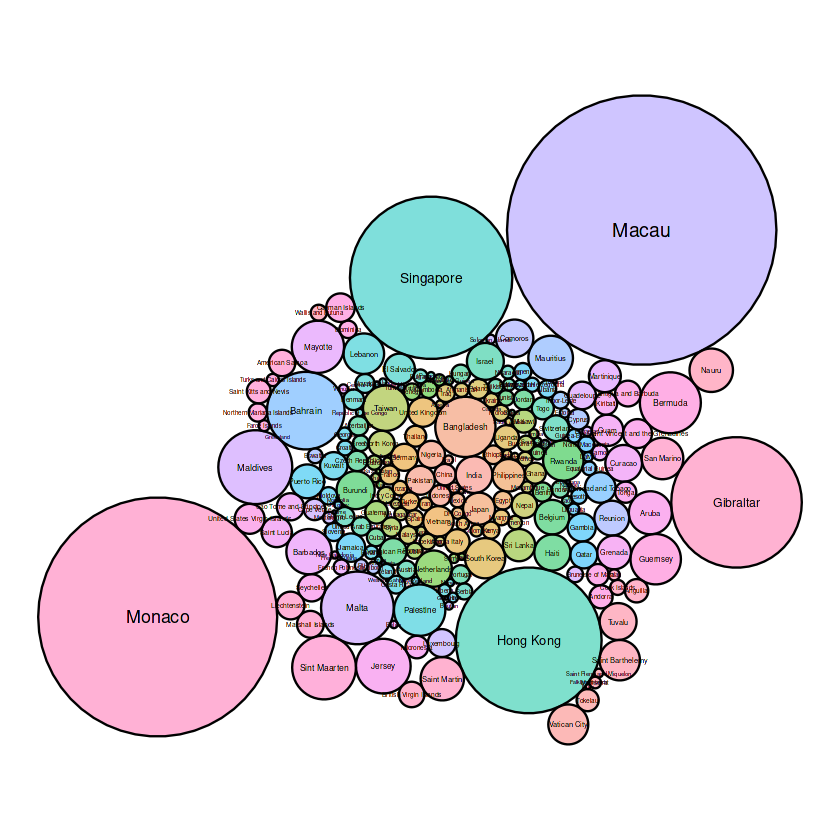

In [17]:
# Then make the chart
ggplot() + 
  geom_polygon(data = dat.gg, aes(x, y, group = id, fill=as.factor(id)), colour = "black", alpha = 0.5) +
  geom_text(data = data, aes(x, y, size=value, label = group)) +
  scale_size_continuous(range = c(1,4)) +
  theme_void() + 
  theme(legend.position="none") +
  coord_equal()

The final chart shows the distribution of population density across different countries, with larger circles representing higher population densities. From the chart, we can see that Macau, Monaco, Singapore, Hong Kong, and Gibraltar have the highest population densities.

This visualization allows us to quickly identify and compare population densities across different countries. Population density is an important indicator of urbanization, land use, and infrastructure.

It's worth noting that the population density data used in this analysis is from 2002, and it's important to keep in mind that population density can change over time due to various factors such as urbanization, migration, and changes in land use. 

<a id="prediction"></a>
<h4>Prediction</h4>
In this section, we will be making predictions for the global population growth from the year 1970 to 2050. The code creates a new data frame with columns for year and total population, and uses the data from the world_population dataset to fill in the population values for the years 1970-2020. The data for the years 2030, 2040, and 2050 will be the predicted values.

A linear model is created using the year and total population data, and the predict function is used to generate population predictions for the years 2030, 2040, and 2050. These predicted values are then added to the total_world data frame.

The graph shows the world population growth over the years, with the population values displayed in billions. The line in the graph shows the linear trend of the population growth, and the points and labels show the actual population values for each year.

In [18]:
# Create a new data frame with a column for year and a column for total population
total_world <- data.frame(year = c("1970", "1980", "1990", "2000", "2010", "2020", "2022", "2030", "2040", "2050"), 
                          total_population = numeric(10))

total_world$total_population[1] <- sum(world_population$pop_1970)
total_world$total_population[2] <- sum(world_population$pop_1980)
total_world$total_population[3] <- sum(world_population$pop_1990)
total_world$total_population[4] <- sum(world_population$pop_2000)
total_world$total_population[5] <- sum(world_population$pop_2010)
total_world$total_population[6] <- sum(world_population$pop_2020)
total_world$total_population[7] <- sum(world_population$pop_2022)
total_world[8:10, "total_population"] <- NA


#format the "year" columns as numeric
total_world$year <- as.numeric(total_world$year)

In [19]:
# create a linear model for the population
pop_lm <- lm(total_population ~ year, data = total_world)

prediction <- predict(pop_lm, data.frame(year = c(2030, 2040, 2050)))

total_world[8:10, "total_population"] <- prediction

#create readible numbers for the graph
total_world<-transform(total_world, population_read=round(total_population/1000000000,2))

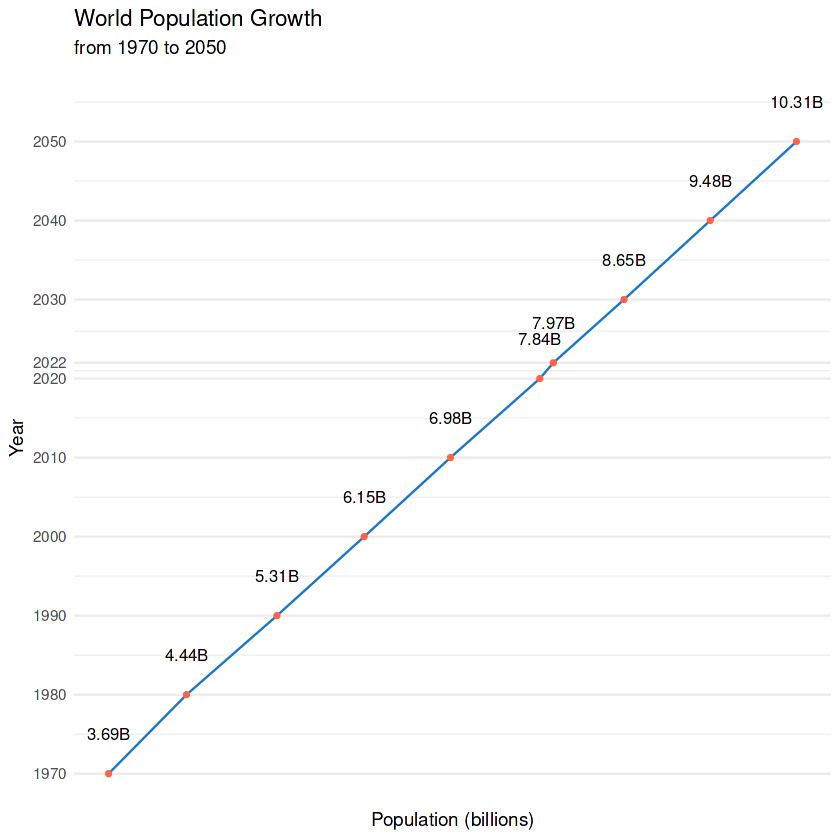

In [20]:
ggplot(total_world, aes(x=population_read, y=year)) +
  geom_line(color = "dodgerblue3") +
  geom_point(size=1, color = "tomato") +
  geom_text(aes(label = paste0(population_read,"B")), nudge_y = 5, check_overlap = T, size = 3.4) +
  theme_minimal() +
  scale_y_continuous(breaks = as.numeric(total_world$year)) +
  scale_x_continuous(breaks = seq(0,3,0.5)) +
  xlab("Population (billions)") +
  ylab("Year") +
  labs(title = "World Population Growth", subtitle = "from 1970 to 2050")

The graph gives us an idea of the world population growth trend from 1970 to 2050. The predictions indicate that the global population is expected to reach 8.65 billion in 2030, 9.48 billion in 2040, and 10.31 billion in 2050. 

It's very important to keep in mind that population growth is influenced by a number of factors other than the data we are analyzing, and that these predictions are based on a linear model, which may not take into account any potential changes in these factors that may occur in the future.

# Conclusion

In conclusion, this notebook has provided an in-depth analysis of global population data using R programming language. We've explored various aspects of population statistics such as the top countries by population in 2022, population growth rate by continent, population densities of countries, and predictions for future global population growth.

Our analysis has given us a glimpse into the distribution of the world's population. We've seen that the majority of the world's population is concentrated in Asia, with China and India being the two most populous countries, accounting for almost 1.5 billion people each. 

It's also clear that the continent of Asia holds the largest percentage of the world population. Africa, on the other hand, has the second-highest population percentage but is the least densely populated continent. This highlights the importance of considering both raw population numbers and population density when analyzing population data. 

Moreover Africa has the highest population growth rate among the continents since 1970. Macau, Monaco, Singapore, Hong Kong, and Gibraltar have the highest population densities. 

Finally, predictions indicate that the global population is expected to reach 8.65 billion in 2030, 9.48 billion in 2040, and 10.31 billion in 2050.

It's important to remember that behind every number, there's a human being with aspirations, needs, and dreams. Understanding population trends is crucial for understanding the future needs and demands of our planet, but it's also important to remember that every person counts:)